In [135]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statistics

In [136]:
data = pd.read_excel("zeeman.xlsx")

In [137]:
data

,B / mT,a1 / °,a2 / °,&D&l/&l / %,DE / µeV,deltaE/B,Bohr magneton
0,6,1.075,1.067,0.00012,-2.3,0.383333,6.133333e-23
1,51,1.075,1.084,-0.00014,2.8,0.054902,8.784314e-24
2,51,1.075,1.053,0.00033,-6.4,0.125490,2.007843e-23
3,89,1.075,1.087,-0.00019,3.7,0.041573,6.651685e-24
4,89,1.075,1.056,0.00029,-5.6,0.062921,1.006742e-23
5,131,1.075,1.043,0.00048,-9.3,0.070992,1.135878e-23
6,131,1.075,1.095,-0.00031,6.0,0.045802,7.328244e-24
7,170,1.075,1.039,0.00055,-10.6,0.062353,9.976471e-24
8,170,1.075,1.108,-0.00051,9.9,0.058235,9.317647e-24
9,210,1.075,1.030,0.00067,-12.9,0.061429,9.828571e-24


In [138]:
negative_DE = []
negative_B = []
negative_bm = []

positive_DE = []
positive_B = []
positive_bm = []
for i in range(0, len(data)):
    if data.iloc[i][4] < 0:
        negative_DE.append(data.iloc[i][4])
        negative_B.append(data.iloc[i][0])
        negative_bm.append(data.iloc[i][6])
    if data.iloc[i][4] > 0:
        positive_DE.append(data.iloc[i][4])
        positive_B.append(data.iloc[i][0])
        positive_bm.append(data.iloc[i][6])

In [206]:
print(np.mean(positive_bm[5::]))
print(np.std(positive_bm[5::]))
print(np.mean(negative_bm[5::]))
print(np.std(negative_bm[5::]))

8.633477347519638e-24
9.339882320239696e-26
1.0131504345039328e-23
1.4552356326663302e-25


In [140]:
positive_fit = 10E2 *(np.mean(positive_bm)/(1.6E-19)) * np.linspace(0,600, 2)
negative_fit = -10E2 *(np.mean(negative_bm[2::])/(1.6E-19)) * np.linspace(0,600, 2)

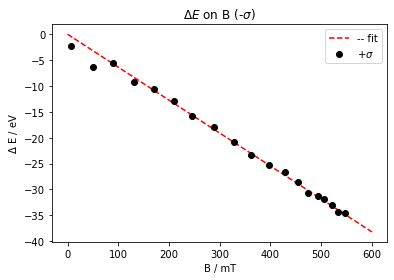

In [141]:
plt.errorbar(negative_B, negative_DE, fmt="o", color="black", label="$+ \sigma$")
plt.plot(np.linspace(0,600, 2), negative_fit, "--r", label="-- fit")
plt.xlabel('B / mT')
plt.ylabel('$\Delta$ E / eV')
plt.legend(loc="upper right")
plt.title("$\Delta E$ on B (-$\sigma$)")
plt.savefig("neg_sigma.png")

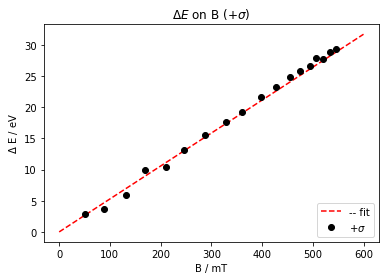

In [142]:
plt.errorbar(positive_B, positive_DE, fmt="o", color="black", label="$+\sigma$") # 6 as 0.1A=6mT, 
plt.xlabel('B / mT')
plt.plot(np.linspace(0,600, 2), positive_fit,"--r", label="-- fit")
plt.ylabel('$\Delta$ E / eV')
plt.legend(loc="lower right")
plt.title("$\Delta E$ on B (+$\sigma$)")
plt.savefig("pos_sigma.png")

In [199]:
print(np.mean(data['Bohr magneton'][6::]))

9.310401219160757e-24


In [200]:
print(np.std(data['Bohr magneton']))

8.623155071413669e-24


In [201]:
print(np.mean(data['Bohr magneton'][6::]))

9.310401219160757e-24


In [202]:
print(np.std(data['Bohr magneton'][6::]))

8.4435599405565e-25


In [147]:
exemplar_pos_sigma = pd.read_excel("zeeman_exemplar.xlsx", sheet_name="+sigma")

In [148]:
exemplar_neg_sigma = pd.read_excel("zeeman_exemplar.xlsx", sheet_name="-sigma")

In [149]:
exemplar_pos_sigma['bohr_magneton'] = (exemplar_pos_sigma['∆E/μeV'] * 1.6E-19 * 10E-6)/(exemplar_pos_sigma['B/mT'] * 10E-3)

In [150]:
len(positive_bm[3::])

15

In [151]:
len(negative_bm[4::])

15

In [152]:
bm = []
bm_error = []
average_deltaE = []
for i in range(15):
    bm.append((negative_bm[i + 4] +  positive_bm[i + 3])/2)
    bm_error.append(statistics.stdev([negative_bm[i + 4], positive_bm[i + 3]]))

SyntaxError: invalid syntax (<ipython-input-152-dda92afee8a3>, line 4)

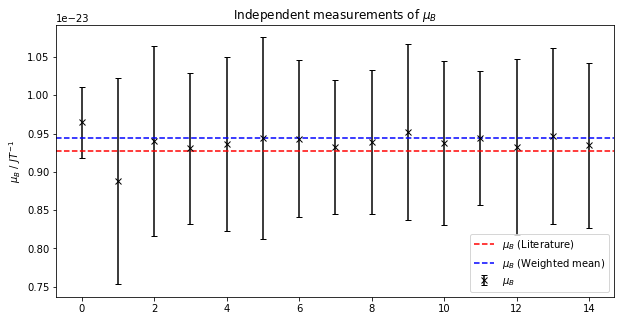

In [153]:
plt.figure(figsize = (10,5))
plt.errorbar([i for i in range(len(bm))], bm, yerr=bm_error, fmt="x", color="black", capsize=3, label="$\mu_B$")
plt.axhline(y=9.27E-24, color="red", ls="--", label="$\mu_B$ (Literature)")
plt.axhline(y=9.44E-24, color="blue", ls="--", label="$\mu_B$ (Weighted mean)")
plt.legend(loc="lower right")
plt.ylabel("$\mu_B$ / $JT^{-1}$")
plt.title("Independent measurements of $\mu_B$")
plt.savefig("bohr_magneton.png")

In [154]:
weights = [1/(i**2) for i in bm_error]

In [155]:
print(np.average(bm, weights=weights))

9.443423367972574e-24


In [156]:
import math

In [157]:
print(math.sqrt(1/np.sum(weights)))

2.4323292678235186e-25


In [167]:
residuals = []
for i in range(0, len(negative_bm) - 1):
    residuals.append((negative_bm[i+1] -  positive_bm[i]))
    #bm_error.append(statistics.stdev([negative_bm[i + 4], positive_bm[i + 3]]))

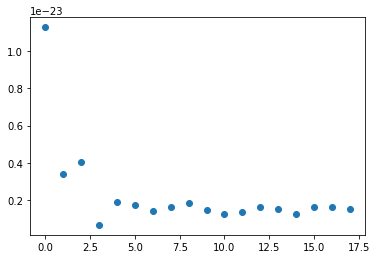

In [172]:
plt.scatter([i for i in range(len(negative_bm) - 1)], residuals)

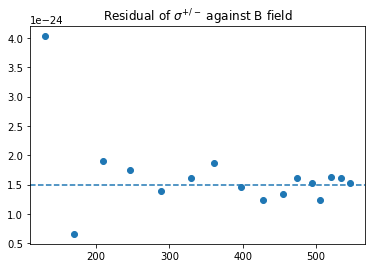

In [198]:
plt.scatter(positive_B[2::], np.array(residuals[2::]))
plt.title("Residual of $\sigma^{+/-} $ against B field")
plt.axhline(y=0.15E-23, ls="--")

In [207]:
print(np.std(residuals[4::]))

2.0129835889281742e-25


In [211]:
print(np.array(negative_DE[4::]) + np.array(positive_DE[3::]))

[-0.7 -2.5 -2.7 -2.5 -3.3 -4.2 -3.6 -3.3 -3.8 -4.8 -4.7 -3.9 -5.3 -5.4
 -5.2]


In [177]:
from sklearn.linear_model import LinearRegression

In [184]:
reg = LinearRegression().fit(np.array(positive_B[4::]).reshape(-1,1), np.array(residuals[4::]).reshape(-1,1))

In [185]:
reg.coef_

array([[-8.36369257e-28]])